<a href="https://colab.research.google.com/github/hr1588/NLP/blob/main/kaggle_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle api로 data load

In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c learning-equality-curriculum-recommendations

 94% 239M/254M [00:01<00:00, 161MB/s]
100% 254M/254M [00:01<00:00, 165MB/s]


In [7]:
!unzip -q /content/learning-equality-curriculum-recommendations.zip

In [12]:
import os
import json
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [9]:
topics = pd.read_csv("topics.csv")
content = pd.read_csv("content.csv")
correlations = pd.read_csv("correlations.csv")

# Topics

In [10]:
topics

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True
...,...,...,...,...,...,...,...,...,...
76967,t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False
76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True
76969,t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True
76970,t_fffe811a6da9,تحديد العلاقة بين الإحداثيّات القطبية والإحداث...,5b9e5ca86571f90499ea987f,9fd860,source,2,ar,t_5b4f3ba4eb7d,True


In [47]:
topics.isnull().sum()

id                 0
title              2
description    42019
channel            0
category           0
level              0
language           0
parent           171
has_content        0
dtype: int64

## title + description

In [42]:
def title_description(df):
    texts = df['title'].fillna('') + ' ' + df['description'].fillna('')
    title_len = np.clip(texts.apply(lambda x : len(x.strip().split(' '))), 0, 100) 
    # 전달받은 숫자를 최소값 또는 최대값 사이의 값인지 체크, 더 크거나 작은경우 지정한 값으로 변경
    sns.histplot(title_len)
    plt.title('Number of words per title+description, clipped at 100')
    plt.show()

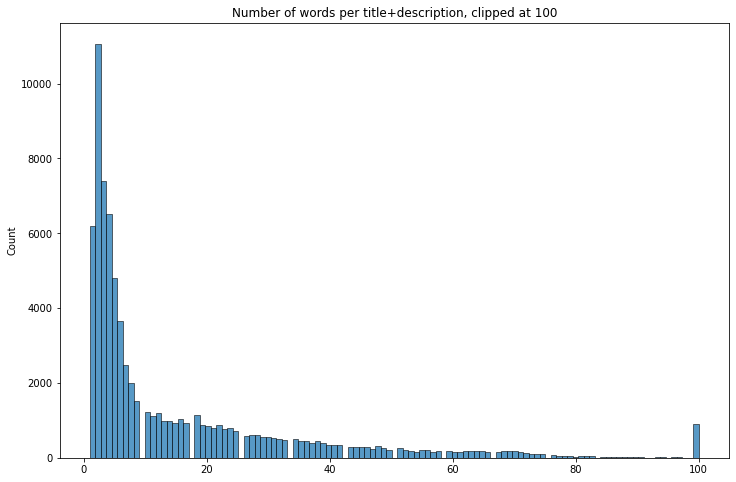

In [43]:
title_description(topics)

## source

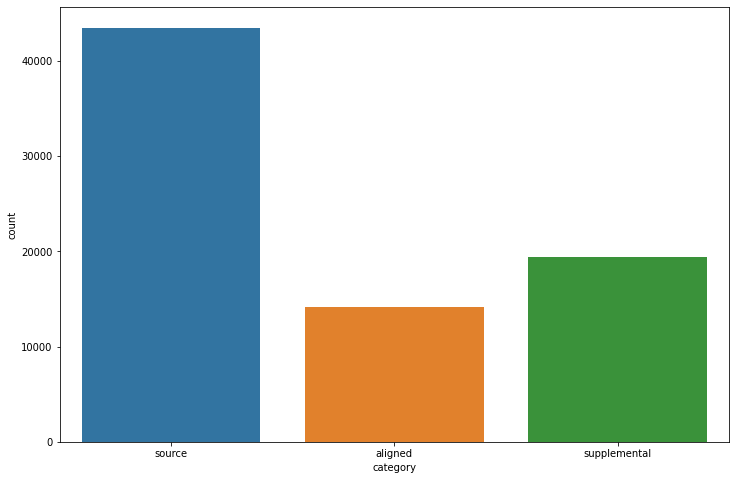

In [14]:
sns.countplot(x = 'category', data = topics)

## language

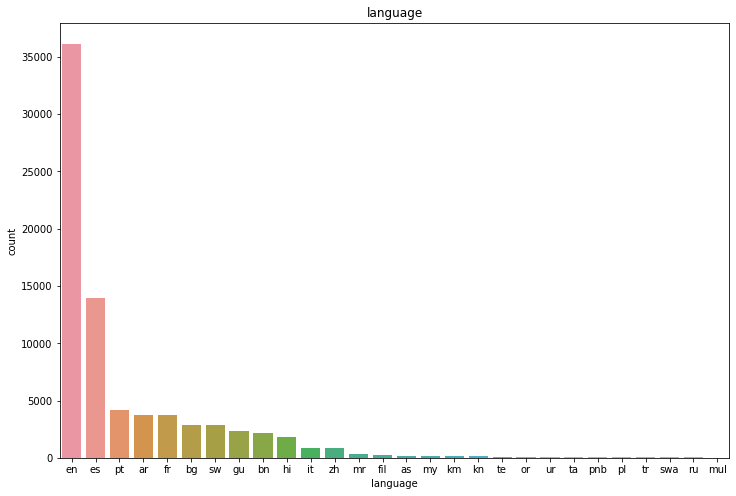

In [19]:
sns.countplot(x = 'language', data = topics, order = topics['language'].value_counts().index)
plt.title('language')
plt.show()

## channels

number of channels : 171


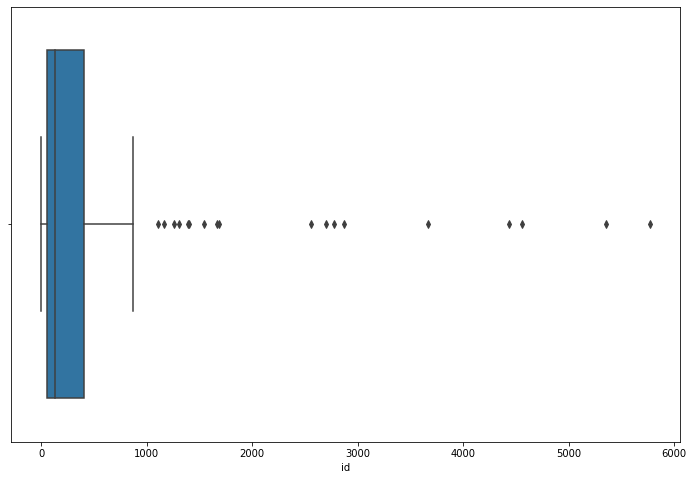

In [38]:
print("number of channels :", len(topics['channel'].unique()))

agg = topics.groupby('channel').agg(lambda x : len(list(x)))['id']
sns.boxplot(x = agg)
plt.show()

In [79]:
print('min : ',np.min(agg))
print('25% : ',np.percentile(agg, 25))
print('median : ',np.median(agg))
print('mean : ', round(np.mean(agg),1))
print('75% : ',np.percentile(agg, 75))
print('max : ',np.max(agg))

min :  1
25% :  61.0
median :  136.0
mean :  450.1
75% :  411.0
max :  5770


10-90 % : 29 ~ 1106


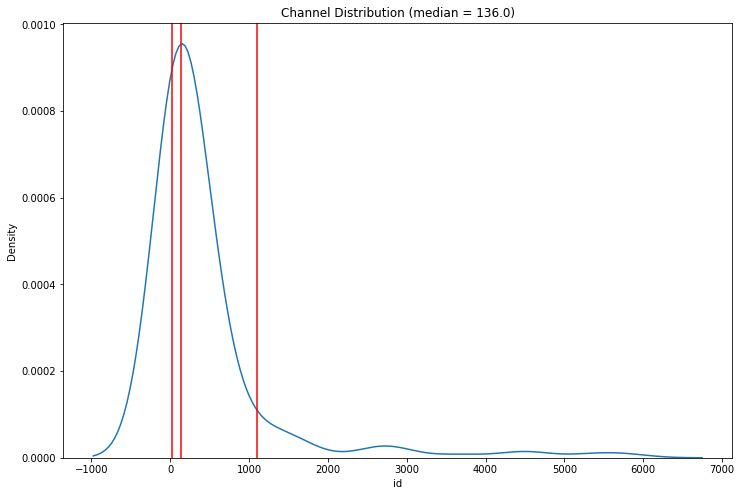

In [46]:
sns.kdeplot(agg) # 커널 밀도 추정, histplot 등을 smooth 하게 표현, https://darkpgmr.tistory.com/147

plt.title(f'Channel Distribution (median = {np.median(agg)})')

d1 = int(np.percentile(agg, 10))
plt.axvline(d1, c = 'red')

d2 = int(np.percentile(agg,50))
plt.axvline(d2, c = 'red')

d3 = int(np.percentile(agg,90))
plt.axvline(d3, c = 'red')

print(f"10-90 % : {d1} ~ {d3}")
plt.show()

## Tree ?

In [40]:
tree = topics[topics["channel"] == "000cf7"].sort_values('level').reset_index(drop = True)
tree

,id,title,description,channel,category,level,language,parent,has_content
0,t_bcf10c48c68b,Khan Academy (български език),NaN,000cf7,source,0,bg,NaN,False
1,t_afd8db5e4f44,Математика,NaN,000cf7,source,1,bg,t_bcf10c48c68b,False
2,t_a739dfbb9780,Хуманитарни науки,Красота. Война. Религия. Общество. Език. Човеш...,000cf7,source,1,bg,t_bcf10c48c68b,False
3,t_ff2df4ca09e5,Физика (България),NaN,000cf7,source,1,bg,t_bcf10c48c68b,False
4,t_a8d3be502f0b,Математика (България),NaN,000cf7,source,1,bg,t_bcf10c48c68b,False
...,...,...,...,...,...,...,...,...,...
2862,t_5adfd62b5a6b,Въведение в точкови диаграми (диаграми на разс...,Нека разгледаме основите на построяването на т...,000cf7,source,4,bg,t_991faa34ed2c,True
2863,t_5af060145876,Умножение по метода на решетката,Научи се да умножаваш и по друг нетрадиционен ...,000cf7,source,4,bg,t_4d110c968d2b,True
2864,t_5af2a0098cd9,Линейни неравенства с едно неизвестно,В този урок ще научиш как се решават по-сложни...,000cf7,source,4,bg,t_d850b10cbe33,True
2865,t_5b21a2fb4200,Химични връзки и реакции,Научи как атомите взаимодействат помежду си и ...,000cf7,source,4,bg,t_d432b564bb67,True


- 하나의 채널안의 tree 구조를 확인

# content

In [41]:
content

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA
...,...,...,...,...,...,...,...,...
154042,c_fffcbdd4de8b,2. 12: Diffusion,NaN,html5,What will eventually happen to these dyes?\n\n...,en,CSU and Merlot,CC BY-NC-SA
154043,c_fffe15a2d069,Sommare facendo gruppi da 10,Sal somma 5+68 spezzando il 5 in un 2 e un 3.\n\n,video,NaN,it,NaN,NaN
154044,c_fffed7b0d13a,Introdução à subtração,Sal fala sobre o que significa subtrair. Os ex...,video,NaN,pt,NaN,NaN
154045,c_ffff04ba7ac7,SA of a Cone,NaN,video,NaN,en,NaN,NaN


In [59]:
content.isnull().sum()

id                      0
title                   9
description         64591
kind                    0
text                80012
language                0
copyright_holder    82226
license             80012
dtype: int64

## title_description

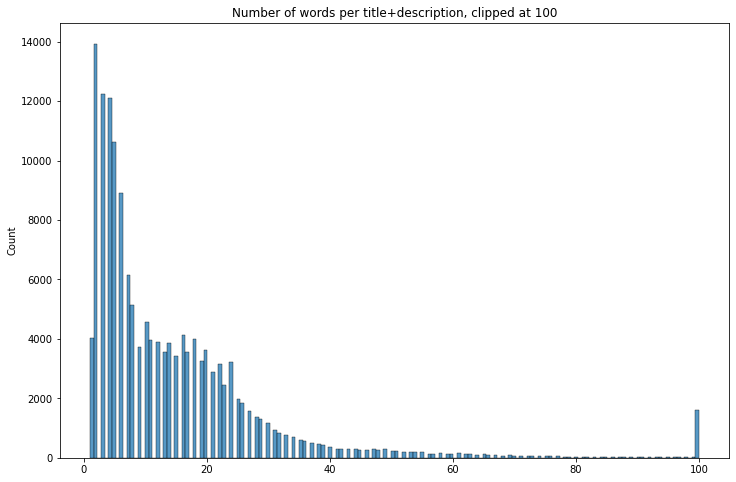

In [44]:
title_description(content)

## language

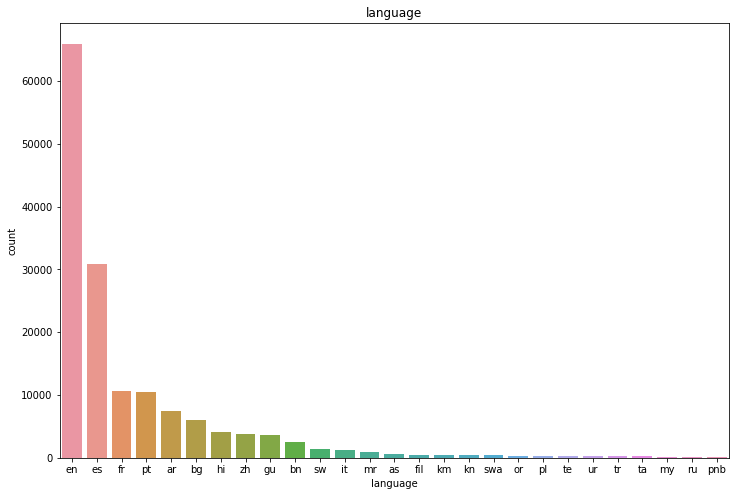

In [58]:
sns.countplot(x = 'language', data = content, order = content['language'].value_counts().index)
plt.title('language')
plt.show()

## kind & text

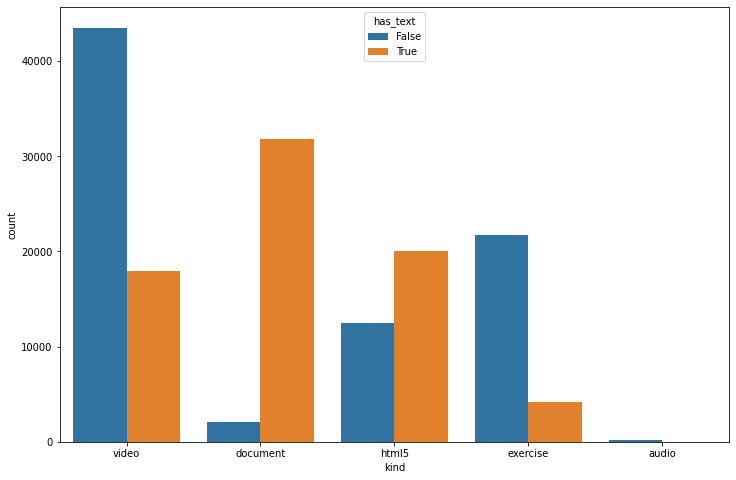

In [60]:
content['has_text'] = ~content['text'].isna()
sns.countplot(x = "kind", hue = "has_text", data = content)

# topics & content 비교

In [65]:
topic_texts = topics['title'].fillna('') + ' ' + topics['description'].fillna('')
topic_len = np.clip(topic_texts.apply(lambda x : len(x.strip().split(' '))), 0, 100) 

content_texts = content['title'].fillna('') + ' ' + content['description'].fillna('')
content_len = np.clip(content_texts.apply(lambda x : len(x.strip().split(' '))), 0, 100) 

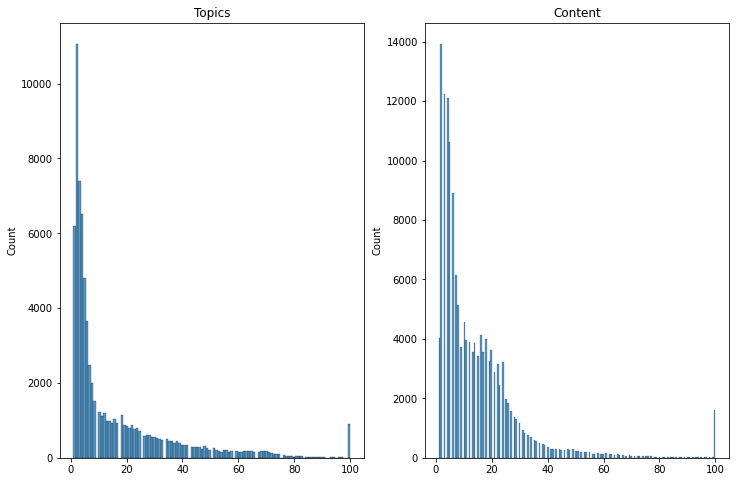

In [70]:
fig, ax = plt.subplots(ncols=2)

sns.histplot(topic_len, ax = ax[0])
sns.histplot(content_len, ax = ax[1])

ax[0].set_title('Topics')
ax[1].set_title('Content')

plt.show()

<Figure size 1152x720 with 0 Axes>

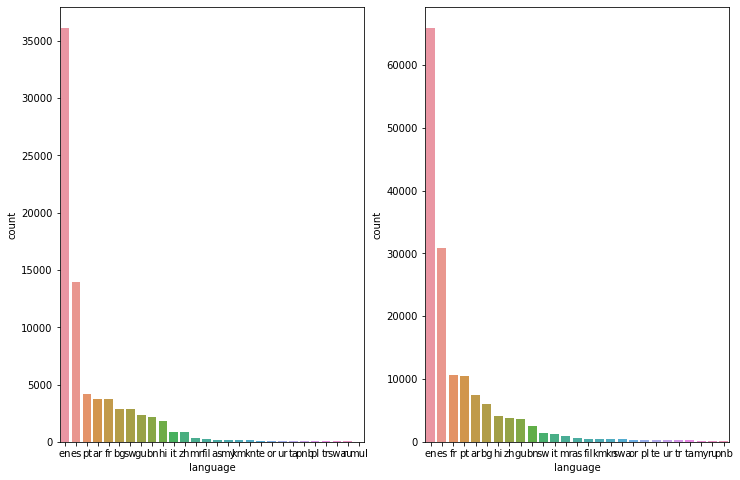

In [73]:
fig = plt.figure(figsize = (16,10))

sns.countplot(x = 'language', data = topics, order = topics['language'].value_counts().index, ax = ax[0])
sns.countplot(x = 'language', data = content, order = content['language'].value_counts().index, ax = ax[1])
plt.show()

# correlations

In [61]:
correlations

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...,...,...
61512,t_fff830472691,c_61fb63326e5d c_8f224e321c87
61513,t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...
61514,t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5
61515,t_fffe14f1be1e,c_cece166bad6a


In [62]:
correlations.isnull().sum()

topic_id       0
content_ids    0
dtype: int64

In [63]:
num_corr = correlations['content_ids'].apply(lambda x : len(x.split(' ')))

print('Total number of correlations :', num_corr.sum())
print('Average number of correlations per topic :', np.round(num_corr.mean(), 1))
print('Minimum number of correlations per topic :', num_corr.min())
print('Maximum number of correlations per topic :', num_corr.max())

Total number of correlations : 279919
Average number of correlations per topic : 4.6
Minimum number of correlations per topic : 1
Maximum number of correlations per topic : 293


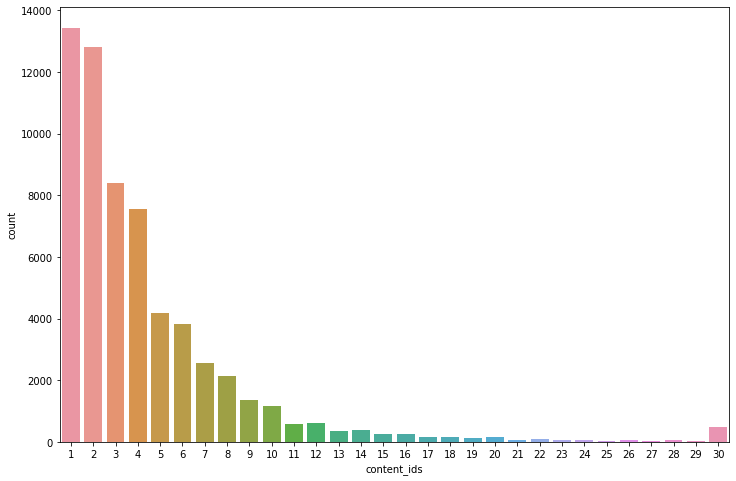

In [64]:
sns.countplot(x = np.clip(num_corr, 0, 30))